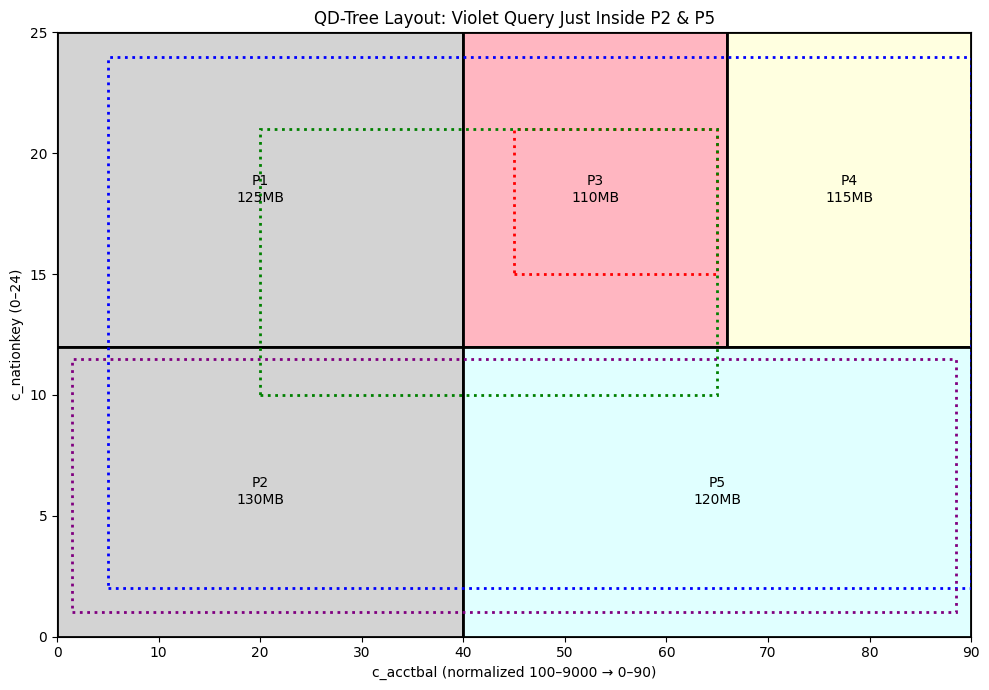

In [5]:
# Re-import required libraries after code execution state reset
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Updated partition data (including sizes and rectangle definitions)
partitions = {
    "P1": {"rect": (0, 12), "width": 40, "height": 13, "color": 'lightgrey', "size": "125MB"},
    "P2": {"rect": (0, 0), "width": 40, "height": 12, "color": 'lightgrey', "size": "130MB"},
    "P3": {"rect": (40, 12), "width": 26, "height": 13, "color": 'lightpink', "size": "110MB"},
    "P4": {"rect": (66, 12), "width": 24, "height": 13, "color": 'lightyellow', "size": "115MB"},
    "P5": {"rect": (40, 0), "width": 50, "height": 12, "color": 'lightcyan', "size": "120MB"},
}

# Initial query layout
queries = {
    "q1": {"box": (45, 15, 20, 6), "color": "red"},
    "q2": {"box": (20, 10, 45, 11), "color": "green"},
    "q3": {"box": (5, 2, 85, 22), "color": "blue"},
    "q4": {"color": "purple"},  # will be updated
}

# Adjust q4 to be just inside P2 and P5 boundaries
padding_x = 1.5
padding_y = 1.0
x_start = padding_x
y_start = padding_y
width = 90 - 2 * padding_x
height = 12.5 - 2 * padding_y
queries["q4"]["box"] = (x_start, y_start, width, height)

# Plot the figure
fig, ax = plt.subplots(figsize=(10, 7))

# Draw partitions
for label, data in partitions.items():
    x, y = data["rect"]
    w, h = data["width"], data["height"]
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor="black", facecolor=data["color"], lw=2))
    ax.text(x + w/2, y + h/2, f"{label}\n{data['size']}", ha='center', va='center', fontsize=10)

# Draw queries
for qname, qinfo in queries.items():
    x, y, w, h = qinfo["box"]
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor=qinfo["color"], facecolor='none',
                                   linestyle='dotted', linewidth=2))

# Titles and formatting
ax.set_xlim(0, 90)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal (normalized 100–9000 → 0–90)")
ax.set_ylabel("c_nationkey (0–24)")
ax.set_title("QD-Tree Layout: Violet Query Just Inside P2 & P5")
plt.tight_layout()

# # Save the output image
# output_path = "/mnt/data/QD_Tree_Violet_Just_Inside_P2_P5.png"
# plt.savefig(output_path)
plt.show()


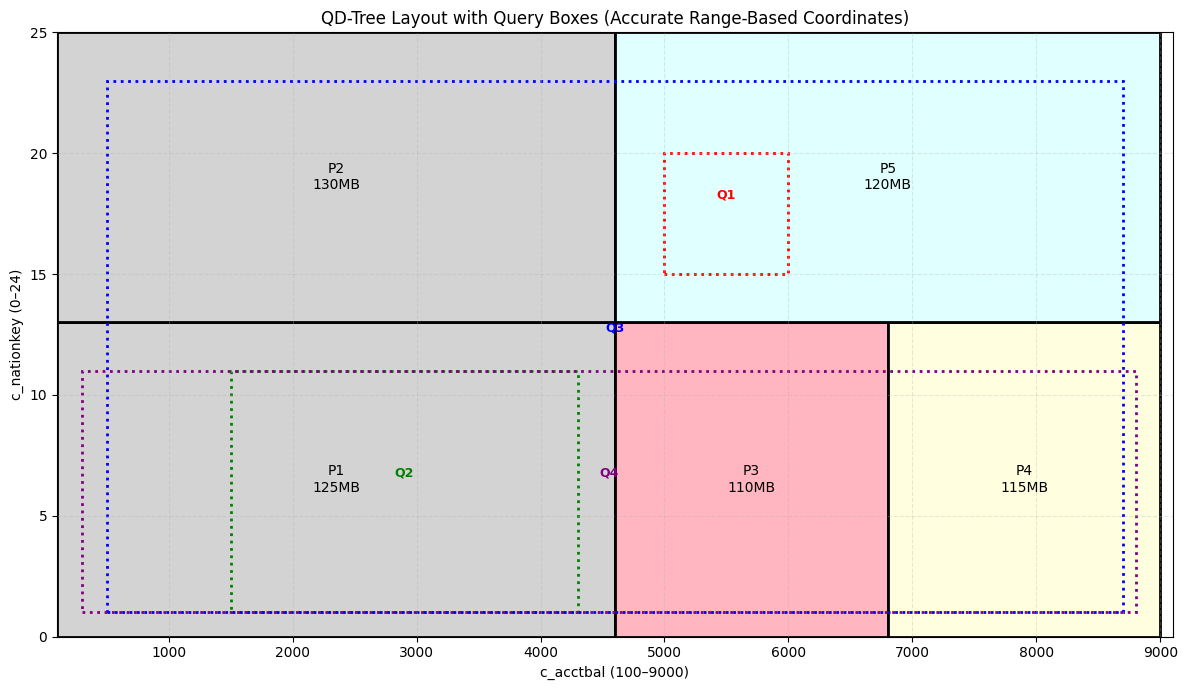

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Updated partition layout based on actual c_acctbal and c_nationkey ranges
partitions = {
    "P1": {"rect": (100, 0), "width": 4600 - 100, "height": 13, "color": 'lightgrey', "size": "125MB"},
    "P2": {"rect": (100, 13), "width": 4600 - 100, "height": 12, "color": 'lightgrey', "size": "130MB"},
    "P3": {"rect": (4601, 0), "width": 6800 - 4601, "height": 13, "color": 'lightpink', "size": "110MB"},
    "P4": {"rect": (6801, 0), "width": 9000 - 6801, "height": 13, "color": 'lightyellow', "size": "115MB"},
    "P5": {"rect": (4601, 13), "width": 9000 - 4601, "height": 12, "color": 'lightcyan', "size": "120MB"},
}

# Query boxes (aligned to actual scale)
queries = {
    "q1": {"box": (5000, 15, 1000, 5), "color": "red"},        # In P5
    "q2": {"box": (1500, 1, 2800, 10), "color": "green"},      # In P1
    "q3": {"box": (500, 1, 8200, 22), "color": "blue"},        # Spans all partitions
    "q4": {"color": "purple"},  # To be updated
}

# Adjust q4 to be just inside P2 and P5 boundaries
padding_x = 200
padding_y = 1
x_start = 100 + padding_x
y_start = 0 + padding_y
width = (9000 - 100) - 2 * padding_x
height = 12 - 2 * padding_y
queries["q4"]["box"] = (x_start, y_start, width, height)

# Plot the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Draw partitions
for label, data in partitions.items():
    x, y = data["rect"]
    w, h = data["width"], data["height"]
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor="black", facecolor=data["color"], lw=2))
    ax.text(x + w / 2, y + h / 2, f"{label}\n{data['size']}", ha='center', va='center', fontsize=10)

# Draw query boxes
for qname, qinfo in queries.items():
    x, y, w, h = qinfo["box"]
    ax.add_patch(patches.Rectangle((x, y), w, h,
                                   edgecolor=qinfo["color"], facecolor='none',
                                   linestyle='dotted', linewidth=2))
    ax.text(x + w / 2, y + h / 2 + 0.5, qname.upper(), ha='center', va='bottom',
            fontsize=9, color=qinfo["color"], fontweight='bold')

# Axis setup
ax.set_xlim(100, 9100)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal (100–9000)")
ax.set_ylabel("c_nationkey (0–24)")
ax.set_title("QD-Tree Layout with Query Boxes (Accurate Range-Based Coordinates)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Uncomment to save the image
# plt.savefig("/mnt/data/QD_Tree_Partition_Layout_Accurate.png")
plt.show()


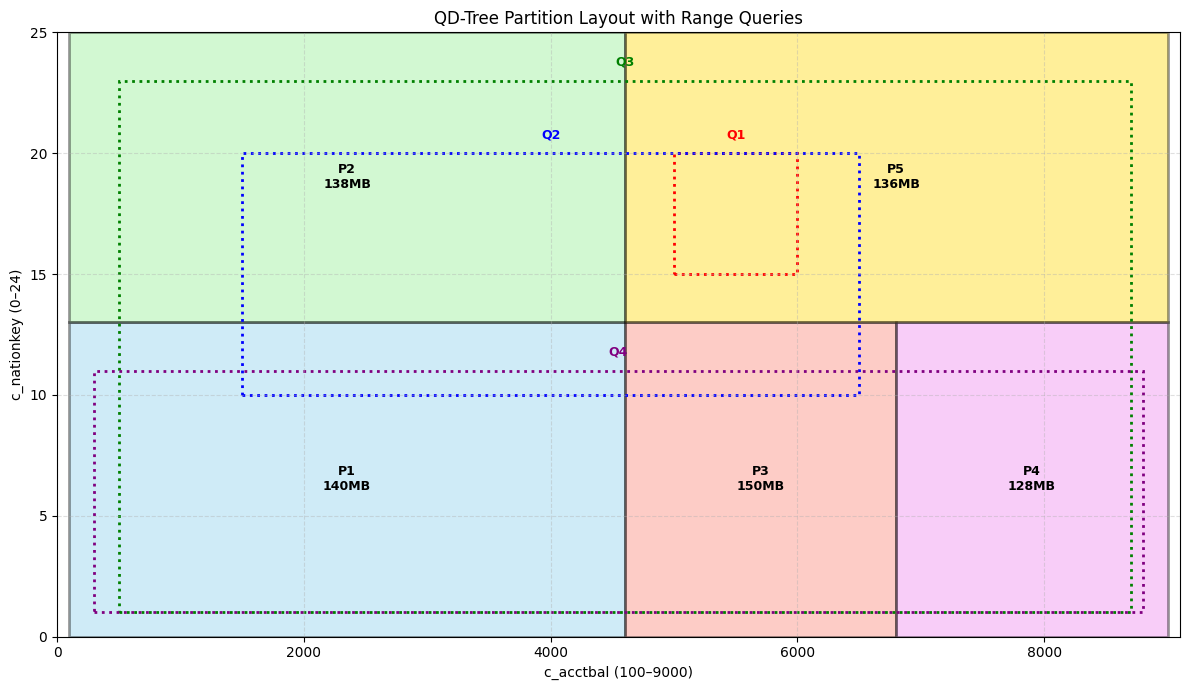

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -----------------------------
# Partition Summary
# -----------------------------
partition_summary = pd.DataFrame({
    'Partition': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'Size_MB': [140, 138, 150, 128, 136]
})

# -----------------------------
# Query Box Definitions
# -----------------------------
queries = {
    "q1": {"box": (5000, 15, 1000, 5), "color": "red"},        # In P5
    "q2": {"box": (1500, 10, 5000, 10), "color": "blue"},      # In P1
    "q3": {"box": (500, 1, 8200, 22), "color": "green"},        # Spans all
    "q4": {"box": (100, 1, 8000 , 10),"color": "purple"} 
}

# Set q4's dimensions
padding_x = 200
padding_y = 1
x_start = 100 + padding_x
y_start = 0 + padding_y
width = (9000 - 100) - 2 * padding_x
height = 12 - 2 * padding_y
queries["q4"]["box"] = (x_start, y_start, width, height)

# -----------------------------
# Unified Layout Plot Function
# -----------------------------
def plot_partition_layout_with_queries(partition_info, queries):
    fig, ax = plt.subplots(figsize=(12, 7))

    # Define partition layout (actual c_acctbal/nationkey ranges)
    layout = [
        {'id': 'P1', 'x': 100, 'y': 0, 'width': 4600 - 100, 'height': 13, 'color': 'skyblue'},
        {'id': 'P2', 'x': 100, 'y': 13, 'width': 4600 - 100, 'height': 12, 'color': 'lightgreen'},
        {'id': 'P3', 'x': 4601, 'y': 0, 'width': 6800 - 4601, 'height': 13, 'color': 'salmon'},
        {'id': 'P4', 'x': 6801, 'y': 0, 'width': 9000 - 6801, 'height': 13, 'color': 'violet'},
        {'id': 'P5', 'x': 4601, 'y': 13, 'width': 9000 - 4601, 'height': 12, 'color': 'gold'}
    ]

    # Draw partitions
    for part in layout:
        size_mb = partition_info[partition_info['Partition'] == part['id']]['Size_MB'].values[0]
        rect = patches.Rectangle((part['x'], part['y']), part['width'], part['height'],
                                 linewidth=2, edgecolor='black', facecolor=part['color'], alpha=0.4)
        ax.add_patch(rect)
        ax.text(part['x'] + part['width']/2, part['y'] + part['height']/2,
                f"{part['id']}\n{size_mb}MB", ha='center', va='center', fontsize=9, weight='bold')

    # Draw queries
    for qname, qinfo in queries.items():
        x, y, w, h = qinfo["box"]
        ax.add_patch(patches.Rectangle((x, y), w, h,
                                       edgecolor=qinfo["color"], facecolor='none',
                                       linestyle='dotted', linewidth=2))
        ax.text(x + w/2, y + h + 0.5, qname.upper(), ha='center', va='bottom',
                fontsize=9, color=qinfo["color"], fontweight='bold')

    # Final layout
    ax.set_xlim(0, 9100)
    ax.set_ylim(0, 25)
    ax.set_xlabel("c_acctbal (100–9000)")
    ax.set_ylabel("c_nationkey (0–24)")
    ax.set_title("QD-Tree Partition Layout with Range Queries")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Run the Combined Plot
# -----------------------------
plot_partition_layout_with_queries(partition_summary, queries)
